# Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataaset

In [2]:
data = pd.read_csv(r'iris_dataset-1.csv')

# Exploratory Data Analysis (EDA) and Visualization

In [3]:
data.columns.value_counts().sum()

np.int64(5)

In [4]:
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


C:\Users\rites\AppData\Local\Temp\ipykernel_23092\2042467211.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


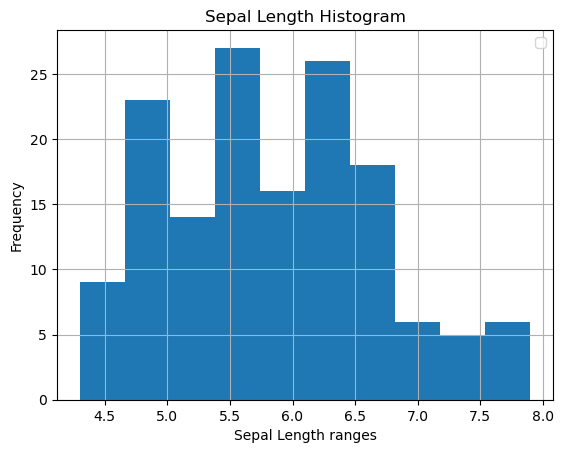

In [6]:
data['sepal_length'].hist()
plt.xlabel('Sepal Length ranges')
plt.ylabel('Frequency')
plt.title('Sepal Length Histogram')
plt.legend()
plt.show()

C:\Users\rites\AppData\Local\Temp\ipykernel_23092\1686317556.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


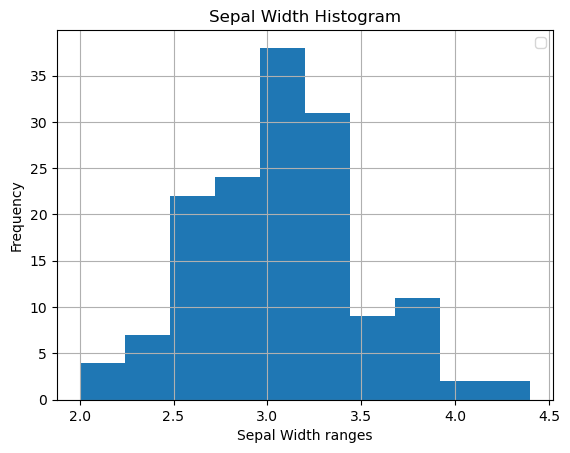

In [7]:
data['sepal_width'].hist()
plt.xlabel('Sepal Width ranges')
plt.ylabel('Frequency')
plt.title('Sepal Width Histogram')
plt.legend()
plt.show()

C:\Users\rites\AppData\Local\Temp\ipykernel_23092\2997438997.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


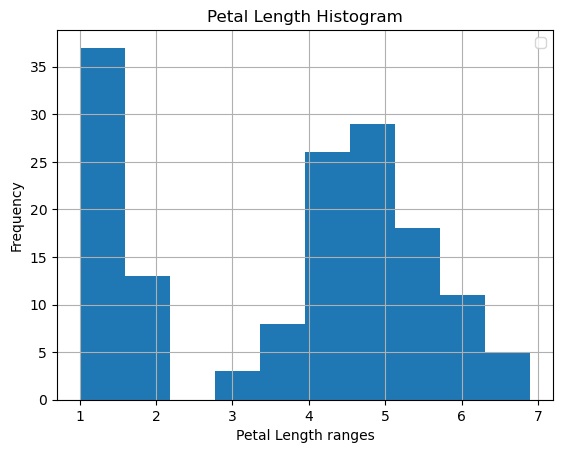

In [8]:
data['petal_length'].hist()
plt.xlabel('Petal Length ranges')
plt.ylabel('Frequency')
plt.title('Petal Length Histogram')
plt.legend()
plt.show()

C:\Users\rites\AppData\Local\Temp\ipykernel_23092\3607139452.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


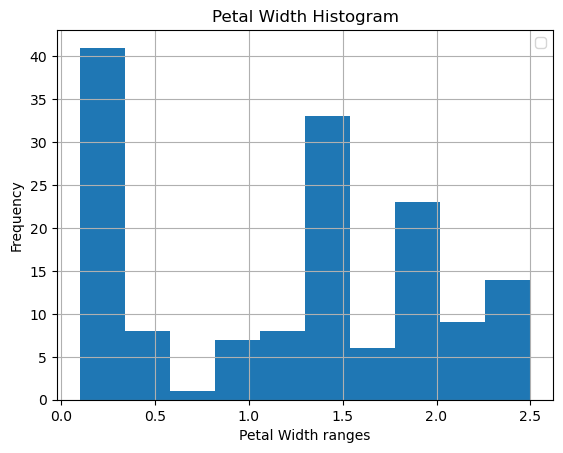

In [9]:
data['petal_width'].hist()
plt.xlabel('Petal Width ranges')
plt.ylabel('Frequency')
plt.title('Petal Width Histogram')
plt.legend()
plt.show()

C:\Users\rites\AppData\Local\Temp\ipykernel_23092\3312854674.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


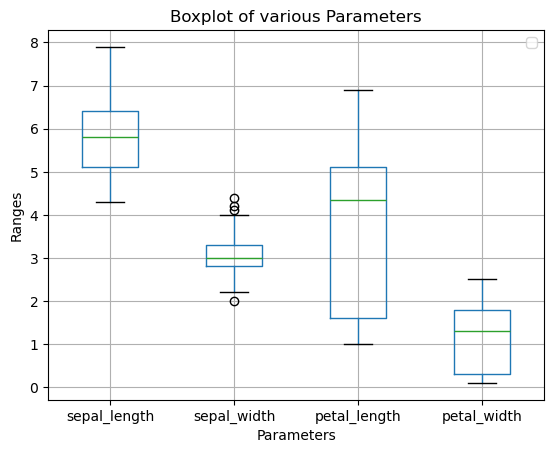

In [10]:
data.boxplot()
plt.xlabel('Parameters')
plt.ylabel('Ranges')
plt.title('Boxplot of various Parameters')
plt.legend()
plt.show()

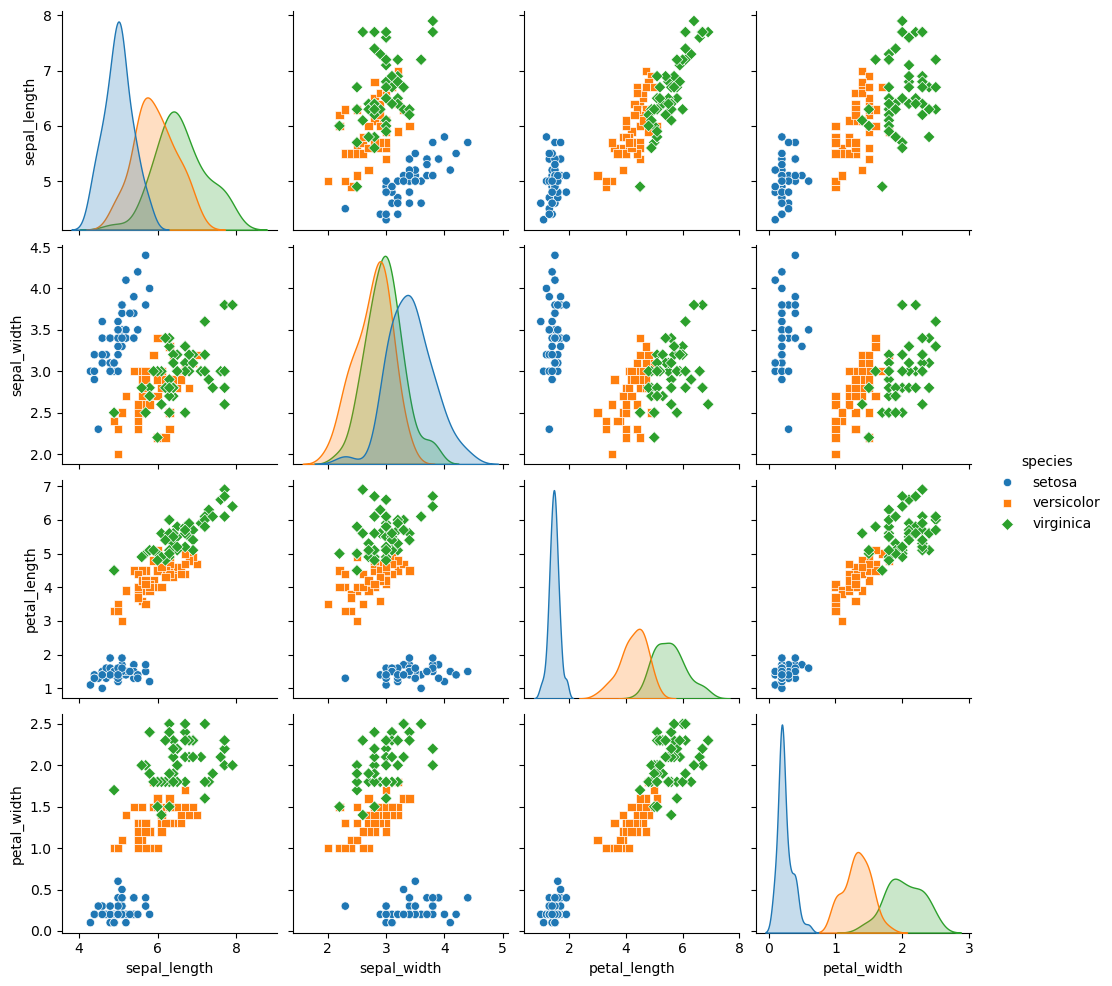

In [11]:
import seaborn as sns

sns.pairplot(data,hue= 'species',markers=['o','s','D'])

plt.show()

In [12]:
df=data.drop(columns=['species'])
corr_mtx = df.corr()

In [13]:
corr_mtx

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

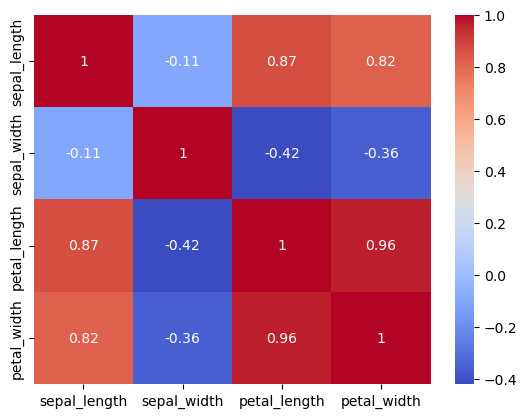

In [14]:
sns.heatmap(corr_mtx,annot=True,cmap='coolwarm')

 # Data Preprocessing – Standardize the Feature Data

In [15]:
# Remove the outliers
Q1 = data['sepal_width'].quantile(0.25)
Q3 = data['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_filtered = data[(data['sepal_width']>= lower_bound) & (data['sepal_width']<= upper_bound)]

In [16]:
data_filtered.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  146 non-null    float64
 3   petal_width   146 non-null    float64
 4   species       146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [18]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
data_filtered.duplicated().sum()

np.int64(3)

In [21]:
data.duplicated().sum()

np.int64(3)

In [22]:
data.shape

(150, 5)

In [23]:
data_filtered.shape

(146, 5)

In [24]:

data_filtered=data_filtered.drop_duplicates()

In [25]:
data_filtered.shape


(143, 5)

In [26]:
from sklearn.preprocessing import StandardScaler


In [27]:
scaler = StandardScaler()

# Split the Dataset into Features (X) and Target (y)

In [123]:
X = data_filtered.drop('species', axis=1)

In [124]:
y = data_filtered['species']

In [125]:
X.shape

(143, 5)

In [89]:
y.shape

(143,)

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X)

In [108]:
X_pca.shape

(143, 1)

# Dimensionality Reduction Using PCA

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [110]:
X_train.shape,y_train.shape

((114, 1), (114,))

In [111]:
X_test.shape,y_test.shape

((29, 1), (29,))

In [112]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled.shape

(114, 1)

# Train a Random Forest Classifier on the Reduced Data

In [113]:
from sklearn.ensemble import RandomForestClassifier


In [114]:
model_rf = RandomForestClassifier(random_state=42)

In [115]:
X_train.shape

(114, 1)

In [116]:
y_train.shape

(114,)

In [117]:
model_rf.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

# Make Predictions and Evaluate the Model After PCA

In [118]:
from sklearn.metrics import accuracy_score,classification_report

In [119]:
y_pred = model_rf.predict(X_test)

In [120]:
accuracy = accuracy_score(y_test,y_pred)

In [121]:
print(accuracy)

0.6896551724137931


# Feature Engineering – Create a New Feature (sepal_length * petal_length)

In [49]:
# Create a new feature by multiplying the ‘sepal_length’ and ‘petal_length’ columns together.

In [50]:
data_filtered.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
data_filtered['product'] = data_filtered['sepal_length'] * data_filtered['petal_length']


In [52]:
data_filtered

,sepal_length,sepal_width,petal_length,petal_width,species,product
0,5.1,3.5,1.4,0.2,setosa,7.14
1,4.9,3.0,1.4,0.2,setosa,6.86
2,4.7,3.2,1.3,0.2,setosa,6.11
3,4.6,3.1,1.5,0.2,setosa,6.90
4,5.0,3.6,1.4,0.2,setosa,7.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,34.84
146,6.3,2.5,5.0,1.9,virginica,31.50
147,6.5,3.0,5.2,2.0,virginica,33.80
148,6.2,3.4,5.4,2.3,virginica,33.48


In [55]:
X1=data_filtered.drop('species',axis=1)

In [57]:
y1 = data_filtered['species']

#  Train a Random Forest Classifier with the New Feature

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [59]:
model_rf = RandomForestClassifier(random_state=42)

In [60]:
X_train.shape

(114, 5)

In [61]:
X_test.shape

(29, 5)

In [62]:
y_train.shape,y_test.shape

((114,), (29,))

In [65]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred= model_rf.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test,y_pred)

In [70]:
print(accuracy)

0.896551724137931


In [71]:
data_filtered.describe()

,sepal_length,sepal_width,petal_length,petal_width,product
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.870629,3.038462,3.830769,1.230769,23.765175
std,0.835045,0.398222,1.750824,0.754538,13.107948
min,4.300000,2.200000,1.000000,0.100000,4.600000
25%,5.100000,2.800000,1.600000,0.300000,8.050000
50%,5.800000,3.000000,4.400000,1.300000,25.650000
75%,6.400000,3.300000,5.100000,1.800000,33.490000
max,7.900000,4.000000,6.900000,2.500000,53.130000


In [126]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
